# Aula 02 - Distribuição de frequência

* Importação do pandas e carregamento dos dados

In [46]:
import pandas as pd

dados = pd.read_csv('dados/dados.csv')
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


## Análise qualitativa

### Método 1

#### Por sexo (0 - Masculino, 1 - Feminino)

In [47]:
frequencia = dados.Sexo.value_counts()
porcentagem = dados.Sexo.value_counts(normalize = True) * 100
frequencia

Sexo
0    53250
1    23590
Name: count, dtype: int64

In [48]:
dist_frequencia = pd.DataFrame(
    {
        'Frequência': frequencia,
        'Porcentagem (%)': round(porcentagem, 2)
    }
).rename_axis(index=None)
dist_frequencia

,Frequência,Porcentagem (%)
0,53250,69.3
1,23590,30.7


* Renomear a coluna sexo

In [49]:
dist_frequencia.rename(index={0: 'Masculino', 1: 'Feminino'}, inplace=True)
dist_frequencia.rename_axis('Sexo', axis='columns', inplace=True)
dist_frequencia

Sexo,Frequência,Porcentagem (%)
Masculino,53250,69.3
Feminino,23590,30.7


### Método 2 (crosstab)

In [50]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}

cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}

In [51]:
frequencia = pd.crosstab(
    dados.Sexo,
    dados.Cor,
)

frequencia.rename(index=sexo, inplace=True)
frequencia.rename(columns=cor, inplace=True)

frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [52]:
frequencia_porc = round(pd.crosstab(
    dados.Sexo,
    dados.Cor,
    normalize=True
) * 100, 2)

frequencia_porc.rename(index=sexo, inplace=True)
frequencia_porc.rename(columns=cor, inplace=True)

frequencia_porc

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.33,28.88,7.16,0.31,32.62
Feminino,0.13,12.52,3.76,0.15,14.14


* Renda média

In [53]:
renda_media = round(pd.crosstab(
    dados.Sexo,
    dados.Cor,
    aggfunc='mean',
    values=dados.Renda
), 2)

renda_media.rename(index=sexo, inplace=True)
renda_media.rename(columns=cor, inplace=True)

renda_media

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.71,2925.74,1603.86,4758.25,1659.58
Feminino,2464.39,2109.87,1134.60,3027.34,1176.76


## Análise quantitativa

* Criando faixas de renda

In [54]:
menor_renda = dados.Renda.min()
maior_renda = dados.Renda.max()

classes_renda = [menor_renda, 1576, 3152, 7880, 15760, maior_renda]

classes_renda

[np.int64(0), 1576, 3152, 7880, 15760, np.int64(200000)]

In [55]:
labels = ['E', 'D', 'C', 'B', 'A']

* Adicionando a coluna com a classificação de classes

In [56]:
dados['Classe'] = pd.cut(
    x=dados.Renda,
    bins=classes_renda,
    labels=labels,
    include_lowest=True
)

dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Classe
0,11,0,23,8,12,800,1.603808,E
1,11,1,23,2,12,1150,1.739790,E
2,11,1,35,8,15,880,1.760444,E
3,11,0,46,2,6,3500,1.783158,C
4,11,1,47,8,9,150,1.690631,E
...,...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030,E
76836,53,0,30,4,7,1500,1.792934,E
76837,53,0,32,8,12,1300,1.830587,E
76838,53,0,57,8,4,1500,1.726344,E


* Frequência x Percentual

In [57]:
frequencia = dados.Classe.value_counts()
porcentagem = round(dados.Classe.value_counts(normalize=True) * 100, 2)

dist_freq_quantitativas = pd.DataFrame(
    {
        'Frequência':frequencia,
        'Porcentagem (%)':porcentagem
    }
).rename_axis(index=None)

dist_freq_quantitativas.rename_axis('Classe', axis='columns', inplace=True)

dist_freq_quantitativas.sort_index(ascending=False, inplace=True)

dist_freq_quantitativas

Classe,Frequência,Porcentagem (%)
A,608,0.79
B,2178,2.83
C,7599,9.89
D,16700,21.73
E,49755,64.75


* Distribuição de frequências quantitativas - Classes de amplitude fixa

In [58]:
# Regra de Sturges --> k = 1 + (10/3 * log10(n))
import numpy as np

n = dados.shape[0]
k = int(1 + (10/3 * np.log10(n)))

* Criando as k classes de renda

In [59]:
classes_renda = pd.cut(
    x=dados.Renda,
    bins=k,
    include_lowest=True
)

* Calculando a frequência

In [60]:
frequencia = dados.value_counts(
    classes_renda,
    sort=False
)

In [61]:
porcentagem = round(dados.value_counts(
    classes_renda,
    sort=False,
    normalize=True
) * 100, 3)

In [62]:
dist_freq_quantitativas_amplitude_fixa = pd.DataFrame(
    {
        'Frequência': frequencia,
        'Porcentagem (%)': porcentagem
    }
).rename_axis(index=None)

dist_freq_quantitativas_amplitude_fixa.rename_axis('Faixa', axis='columns', inplace=True)

dist_freq_quantitativas_amplitude_fixa

Faixa,Frequência,Porcentagem (%)
"(-200.001, 11764.706]",75594,98.378
"(11764.706, 23529.412]",1022,1.330
"(23529.412, 35294.118]",169,0.220
"(35294.118, 47058.824]",19,0.025
"(47058.824, 58823.529]",16,0.021
"(58823.529, 70588.235]",5,0.007
"(70588.235, 82352.941]",4,0.005
"(82352.941, 94117.647]",1,0.001
"(94117.647, 105882.353]",6,0.008
"(105882.353, 117647.059]",0,0.000


## Histograma

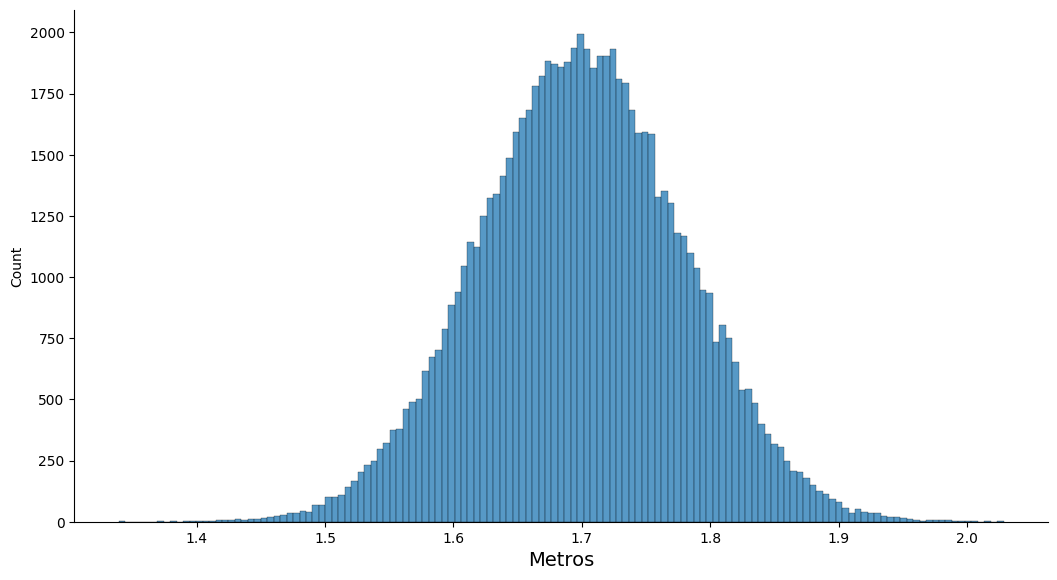

In [65]:
import seaborn as sns

ax = sns.displot(
    dados.Altura,
    kde = False
)

ax.figure.set_size_inches(12, 6)
ax.set_titles('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabels('Metros', fontsize=14)

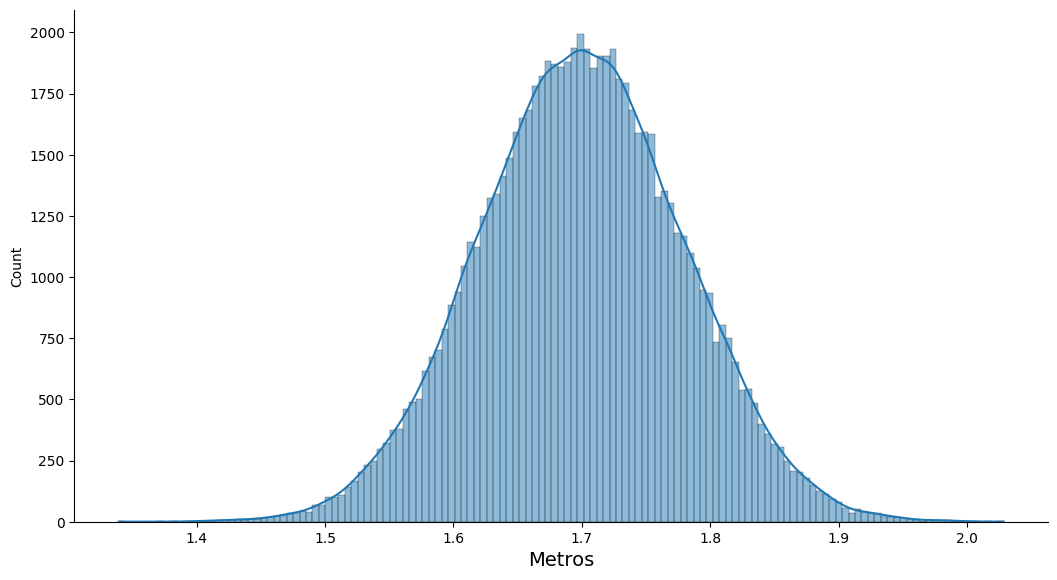

In [69]:
import seaborn as sns

ax = sns.displot(
    dados.Altura,
    kde = True
)

ax.figure.set_size_inches(12, 6)
ax.set_titles('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabels('Metros', fontsize=14)